In [2]:
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Trabajo Practico Final
En este trabajo practico vamos a analizar los datos de una agencia de publicidad con influencers via distintas plataformas (Instagram, Facebook, Twitter, etc).

El primero DF que vamos a analizar es el que contiene data demografia de los distintos perfiles con sus followers y alguna data adicional. El segundo DF contiene informacion individual de los diversos contenidos publicados por los creadores de contenidos

# DF Influencer Data

Los datos de este DF los podemos obtener de 2 maneras:
1. Los creadores de contenido nos comparten las fotos de sus metricas
2. En caso de que no las compartan, se estiman segun perfiles similares que las plataformas nos indican por compartir similitud demografica
Esta informacion se ve en la columna de "tenemos datos?". En el caso de "Parcial" se debe a que mando sus metricas reales pero algunas siguen faltando

In [3]:
path_file1 = "data/TEMPLATE ARGENTINA - Con modificacion Talent (1)-2.xlsx"

In [4]:
data_influencers = pd.read_excel(path_file1)

In [5]:
data_influencers.head()

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other,CPM historico,Tiene Fee Plataforma?,REPRESENTANTE,Nombre Perfil
0,alfonsobenja,https://www.instagram.com/alfonsobenja,Si,2021-03-27,NaN,389358.0,Actor/Actress,NaN,NaN,0.0532,...,0.130,0.03,0.001,-0.001,0.880,0.120,0.0,no,si,si
1,lucianocaceresok,https://www.instagram.com/lucianocaceresok,No,2021-06-17,ludovicods,153011.0,Actor/Actress,NaN,NaN,0.0100,...,0.130,0.03,0.001,-0.001,0.930,0.070,NaN,NaN,NaN,NaN
2,ludovicods,https://www.instagram.com/ludovicods,Parcial,2018-10-23,alfonsobenja,342601.0,Actor/Actress,model,NaN,0.0560,...,0.130,0.03,0.001,-0.001,0.930,0.070,0.0,NaN,NaN,NaN
3,ailinzeta,https://www.instagram.com/ailinzeta,No,2019-02-28,florjazminpe,20200.0,Actor/Actress,NaN,NaN,0.0950,...,0.148,0.05,0.010,0.000,0.816,0.184,NaN,NaN,NaN,NaN
4,basnicar,https://www.instagram.com/basnicar,No,2019-09-19,stefroitman,858457.0,Actor/Actress,Model,NaN,0.0490,...,0.090,0.03,0.010,0.010,0.650,0.350,0.0,NaN,NaN,NaN


In [6]:
data_influencers.columns

Index(['Account', 'Link', 'Tenemos datos?', 'Fecha ultima actualización data ',
       'similar a ', 'Followers', '1ra Categoría', '2da Categoría',
       '3ra Categoría', 'ER', '% Male', '% Female', 'M 13-17', 'M 18-24',
       'M 25-34', 'M 35-44', 'M 45-54', 'M 55-64', 'M "+65"', 'F 13-17',
       'F 18-24', 'F 25-34', 'F 35-44', 'F 45-54', 'F 55-64', 'F "+65"',
       'Argentina', 'Other', 'CPM historico', 'Tiene Fee Plataforma?',
       'REPRESENTANTE', 'Nombre Perfil'],
      dtype='object')

Esta tabla tiene diversas columnas. Lo siguiente que haremos es describir cada columna individualmente
- Account: nombre del perfil (tal como aparece en la plataforma)
- Link: es el URL para ir al perfil del creador de contenido
- Tenemos datos?: determina si los datos fueron enviados o no
- Fecha ultima actualización data: Este campo se actualiza solo con las modificaciones de metricas demograficas. NO con followers o ER
- Similar a: describe si ese perfil es similar a otra creador de contenido
- Followers: tamaño de su audiencia
- 1era categoria: Es la principal categoria del tipo de contenido que ese perfil genera
- 2da categoria: Es la segunda categoria de los contenidos.
- 3er categoria: Es la tercer categoria de los contenidos
(Es importante mencionar que no todos los perfiles cuentan con 2da o 3er categoria)
- ER: Es el Engagment Rate del perfil a la ultima actualizacion. (a modo informativo, el ER es como es la interaccion de la audiencia con los contenidos)
- %Male, %Female, M 13-17, M18-24 a F+65, describe el % que tiene ese perfil en los diversos segmentos. En este caso es importante mencionar que todo lo que comienze con M debe sumar 100% y todo F tambien. Lo mismo sucede con el %Male + %Female = 100%
- Argentina & Other: es el % de audiencia ubicada en Argentina y other es el complemento
- Las demas columnas son una prueba de los ultimos meses, por lo cual no es pertinente el analisis porque aun no estan completas


Las columnas de CPM Historico, tiene fee plataforma, representante y nombre perfil las vamos a eliminar porque estan en proceso de armado y van encontrarse muchos nulos.

Ahora vamos a analizar cuantas filas y columnas tenemos en nuestra base junto a su tipo de dato

In [7]:
data_influencers = data_influencers.drop(['CPM historico','Tiene Fee Plataforma?','REPRESENTANTE','Nombre Perfil'], axis=1)

In [8]:
print(f" El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay {data_influencers.shape[0]} filas y {data_influencers.shape[1]}.los tipos de datos por columnas son {data_influencers.dtypes}")

 El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay 3505 filas y 28.los tipos de datos por columnas son Account                                     object
Link                                        object
Tenemos datos?                              object
Fecha ultima actualización data     datetime64[ns]
similar a                                   object
Followers                                  float64
1ra Categoría                               object
2da Categoría                               object
3ra Categoría                               object
ER                                         float64
% Male                                     float64
% Female                                   float64
M 13-17                                    float64
M 18-24                                    float64
M 25-34                                    float64
M 35-44                                    float64
M 45-54                          

Vamos a analizar si contamos con datos duplicados

In [9]:
cantidad_duplicados = len(data_influencers) - len(data_influencers.drop_duplicates())
cantidad_duplicados

0

Y para ver si contamos con celdas vacias/faltantes vamos a usar el siguiente codigo

In [10]:
data_influencers.isna().sum()

Account                                0
Link                                  11
Tenemos datos?                         0
Fecha ultima actualización data        0
similar a                            801
Followers                              1
1ra Categoría                          0
2da Categoría                       2767
3ra Categoría                       3381
ER                                     0
% Male                                 0
% Female                               0
M 13-17                              166
M 18-24                              163
M 25-34                              162
M 35-44                              164
M 45-54                              174
M 55-64                              178
M "+65"                              165
F 13-17                              172
F 18-24                              165
F 25-34                              165
F 35-44                              165
F 45-54                              174
F 55-64         

Porcentaje de faltantas

In [11]:
data_influencers.isna().sum()/len(data_influencers)

Account                             0.000000
Link                                0.003138
Tenemos datos?                      0.000000
Fecha ultima actualización data     0.000000
similar a                           0.228531
Followers                           0.000285
1ra Categoría                       0.000000
2da Categoría                       0.789444
3ra Categoría                       0.964622
ER                                  0.000000
% Male                              0.000000
% Female                            0.000000
M 13-17                             0.047361
M 18-24                             0.046505
M 25-34                             0.046220
M 35-44                             0.046790
M 45-54                             0.049643
M 55-64                             0.050785
M "+65"                             0.047076
F 13-17                             0.049073
F 18-24                             0.047076
F 25-34                             0.047076
F 35-44   

En razonable que algunas columnas den nulos, como por ejemplo 2da categoría y 3er categoría porque no todos los creadores de contenido tienen mas de una categoria. Estas columnas se utilizar para los creadores de contenido que tienen distintos tipos de contenido.
Por otro lado las columnas de Argentina, Other, ER, Followers y % Male/Female no pueden tener nulos porque todos los perfiles en todas las plataformas tienen estos datos disponibles.
Por ultimo, el rango etario puede contener nulos porque ciertas plataformas como TikTok no cuenta con esa informacion.

En el caso de nulo de followers lo vamos a analizar para eliminar porque no nos sirve el registro para nuestro analisis

In [12]:
data_influencers[data_influencers.Followers.isna()]

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,"M ""+65""",F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other
3495,serevaliconto,https://www.instagram.com/serevaliconto,Si,2018-04-01,NaN,NaN,Instagrammer,NaN,NaN,0.066,...,0.05,0.01,0.45,0.38,0.09,0.04,0.0,0.03,0.89,0.11


Al ser un perfil actualizado hace tanto tiempo podemos descartarlo porque seguramente existio un error al cargarlo

In [13]:
data_influencers = data_influencers[data_influencers['Followers'].notna()]

Para corroborar que el registro ha sido eliminado correctamente ejecutaremos el codigo nuevamente

In [14]:
data_influencers.isna().sum()

Account                                0
Link                                  11
Tenemos datos?                         0
Fecha ultima actualización data        0
similar a                            800
Followers                              0
1ra Categoría                          0
2da Categoría                       2766
3ra Categoría                       3380
ER                                     0
% Male                                 0
% Female                               0
M 13-17                              166
M 18-24                              163
M 25-34                              162
M 35-44                              164
M 45-54                              174
M 55-64                              178
M "+65"                              165
F 13-17                              172
F 18-24                              165
F 25-34                              165
F 35-44                              165
F 45-54                              174
F 55-64         

Ahora lo que haremos en analizar algunos indicadores estadisticos para entender como se ponen las diversas categorias

In [15]:
data_influencers.describe()

,Followers,ER,% Male,% Female,M 13-17,M 18-24,M 25-34,M 35-44,M 45-54,M 55-64,"M ""+65""",F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other
count,3.504000e+03,3504.000000,3504.000000,3504.000000,3338.000000,3341.000000,3342.000000,3340.000000,3330.000000,3326.000000,3339.000000,3332.000000,3339.000000,3339.000000,3339.000000,3330.000000,3330.000000,3331.000000,3504.000000,3504.000000
mean,3.701081e+05,0.044798,0.272837,0.727265,0.028755,0.243576,0.401583,0.211411,0.075680,0.021723,0.022857,0.033054,0.263365,0.399038,0.196509,0.070615,0.022149,0.021341,0.802162,0.197489
std,1.021027e+06,0.057098,0.198578,0.198110,0.030841,0.116308,0.071210,0.081566,0.041368,0.019752,0.077196,0.038460,0.138877,0.082096,0.092924,0.045290,0.021501,0.080360,0.141017,0.140279
min,3.700000e+01,0.000000,0.010000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005000,0.019000,0.000000
25%,2.438500e+04,0.012000,0.120000,0.630000,0.010000,0.150000,0.360000,0.150000,0.050000,0.010000,0.010000,0.010000,0.150000,0.341500,0.120000,0.040000,0.010000,0.010000,0.770000,0.100000
50%,7.610000e+04,0.024600,0.215000,0.785000,0.020000,0.239583,0.410000,0.200000,0.070000,0.020000,0.010000,0.020000,0.250000,0.410000,0.190000,0.060000,0.020000,0.010000,0.840000,0.160000
75%,2.815000e+05,0.053000,0.370000,0.880000,0.040000,0.330000,0.450000,0.270000,0.090000,0.030000,0.020000,0.045000,0.370000,0.453000,0.260000,0.080000,0.030000,0.019000,0.900000,0.230000
max,3.100000e+07,0.800000,0.900000,0.990000,0.280000,0.562500,0.640000,0.530000,0.350000,0.280000,1.000000,0.280000,0.600000,0.620000,0.530000,0.350000,0.280000,1.000000,1.000000,0.981000


En este caso, podemos ver algunos datos erroneos como minimo negativo para "M +65" y "F +65" esto puede suceder porque se calcula como el resto y por decimal puede dar una pequeña diferencia. En este caos al ser tan pequeño el numero vamos a proseguir con el analisis.

En el caso de Followers notamos que la media esta muy alejada de los maximos y el 75% por lo cual podemos inferir que tenemos pocos perfiles con muchos followers.

In [16]:
data_influencers.nlargest(3, 'Followers')

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,"M ""+65""",F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other
1168,paulodybala,https://www.instagram.com/paulodybala,No,2022-04-27,pipagutierrez4,31000000.0,Deporte,NaN,NaN,0.0420,...,0.04,0.01,0.11,0.47,0.27,0.08,0.02,0.04,0.75,0.25
383,ignaciaa_antonia TK,https://www.tiktok.com/@ignaciaa_antonia?lang=es,Si,2022-08-20,ignaciaa_antonia CH,14700000.0,Bailarina,Influencer,NaN,0.0100,...,0.02,0.07,0.41,0.29,0.14,0.06,0.01,0.02,0.12,0.88
1611,sabina.sinr TK,https://www.instagram.com/sabina.sinr TK,No,2021-01-04,sabina.sinr,14400000.0,Foodie,NaN,NaN,0.0217,...,0.01,0.01,0.20,0.45,0.22,0.08,0.03,0.01,0.78,0.22


Por las duas, lo que haremos es convertir la columna de fecha a formato fecha

In [17]:
data_influencers['Fecha ultima actualización data '] = pd.to_datetime(data_influencers['Fecha ultima actualización data '])

Analizamos variables de DataFrame
## 1. Followers

In [18]:
print(f" La cantidad de creadores de contenido en Argentina trabajando en la Agencia ZZZ son:{data_influencers.Account.count()}"
      f" Estos {data_influencers.Account.count()} creadores de contenido cuentan con {data_influencers.Followers.sum().round()} followers"
      f"El promedio de followers por cuenta en todas las plataformas es de:{(data_influencers.Followers.sum() / data_influencers.Account.count()).round()}")

 La cantidad de creadores de contenido en Argentina trabajando en la Agencia ZZZ son:3504 Estos 3504 creadores de contenido cuentan con 1296858756.0 followersEl promedio de followers por cuenta en todas las plataformas es de:370108.0


 En esta variable de followers podemos agregar una nueva columna para segmentar entre Mega, Medio, Pequeno y Nicho segun la cantidad de followers.

Algo similar a lo siguiente:

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


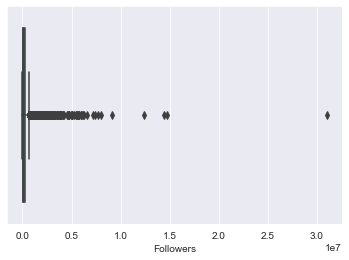

In [19]:
sns.boxplot(data_influencers['Followers']);

En este caso observamos que se comprueba nuestra hipotesis de que existen pocos perfiles muy por sobre la media, por lo cual vamos a filtarlos para analizar a la mayoria de nuestros creadores de contenido

In [20]:
filtro = data_influencers.Followers < 2000000

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


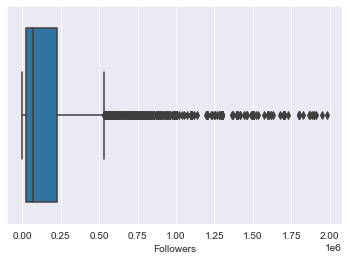

In [21]:
sns.boxplot(data_influencers[filtro]['Followers']);

Ahora si podemos analizar a la mayoria de nuestros creadores de contenido y esto nos permite poder armar una categorizacion de perfiles segun su cantidad de followers

In [22]:
def tamaño_creador(x):
    if x >=800000:
        return 'Grande'
    elif 300000 <= x < 800000:
        return 'Medio'
    else:
        return 'Pequeño'

data_influencers["tamaño_creador"] = data_influencers["Followers"].apply(tamaño_creador)

Para comprobar que la columna de tamaño_creador fue correctamente agregada seleccionaremos los primeros 5 creadores de contenido

In [23]:
data_influencers.head()

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other,tamaño_creador
0,alfonsobenja,https://www.instagram.com/alfonsobenja,Si,2021-03-27,NaN,389358.0,Actor/Actress,NaN,NaN,0.0532,...,0.04,0.340,0.460,0.130,0.03,0.001,-0.001,0.880,0.120,Medio
1,lucianocaceresok,https://www.instagram.com/lucianocaceresok,No,2021-06-17,ludovicods,153011.0,Actor/Actress,NaN,NaN,0.0100,...,0.04,0.340,0.460,0.130,0.03,0.001,-0.001,0.930,0.070,Pequeño
2,ludovicods,https://www.instagram.com/ludovicods,Parcial,2018-10-23,alfonsobenja,342601.0,Actor/Actress,model,NaN,0.0560,...,0.04,0.340,0.460,0.130,0.03,0.001,-0.001,0.930,0.070,Medio
3,ailinzeta,https://www.instagram.com/ailinzeta,No,2019-02-28,florjazminpe,20200.0,Actor/Actress,NaN,NaN,0.0950,...,0.03,0.309,0.453,0.148,0.05,0.010,0.000,0.816,0.184,Pequeño
4,basnicar,https://www.instagram.com/basnicar,No,2019-09-19,stefroitman,858457.0,Actor/Actress,Model,NaN,0.0490,...,0.09,0.460,0.310,0.090,0.03,0.010,0.010,0.650,0.350,Grande


In [24]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63", "#fee08b","#a50026"]

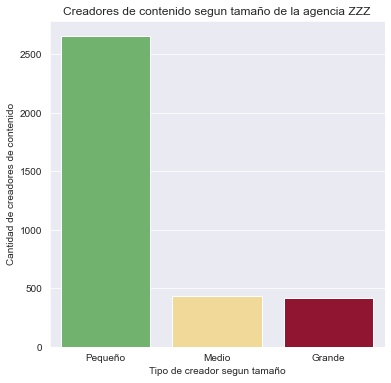

In [25]:
data_influencers['tamaño_creador'].value_counts()
sns.countplot(x='tamaño_creador', data=data_influencers, palette=paleta, order = data_influencers['tamaño_creador'].value_counts().index)
plt.xlabel("Tipo de creador segun tamaño")
plt.ylabel("Cantidad de creadores de contenido")
plt.title("Creadores de contenido segun tamaño de la agencia ZZZ")
plt.show()

Para poder ver la relacion entre followers y ER vamos a filtrar al perfil mas grande.

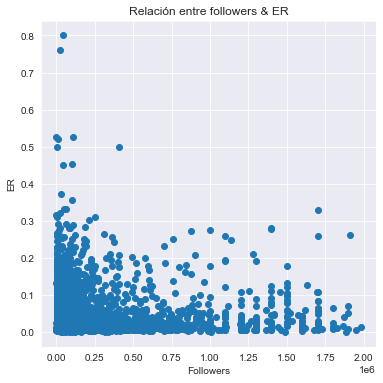

In [26]:
plt.scatter(data_influencers[filtro]['Followers'],data_influencers[filtro]['ER'])
plt.xlabel("Followers")
plt.ylabel("ER")
plt.title("Relación entre followers & ER")
plt.show()

En este caso no se observa una relacion muy estrecha entre followers y ER, solo podemos analizar que tenemos muchos perfiles entre los 0.00 y 0.5 followers y la mayoria de los perfiles cuentan con un ER de 0.0 a 0.2

## Variable categoria

Las categorias en nuestro DF estan algunas con mayuscula otras no, por lo cual vamos a pasar todas a minuscula

In [27]:
data_influencers['1ra Categoría'] = data_influencers['1ra Categoría'].str.lower()

In [28]:
print(f" Las categorias disponibles en la Agencia ZZZ son: {data_influencers['1ra Categoría'].unique()}")

 Las categorias disponibles en la Agencia ZZZ son: ['actor/actress' 'adventure' 'artist' 'bailarina' 'beauty' 'bebidas'
 'blogger' 'celebrities' 'centennials' 'chef' 'deco' 'deporte' 'doctor'
 'empresario' 'fashion' 'fitness' 'foodie' 'fotografo' 'gamer'
 'gourmandsconhambre.ba' 'healthy' 'humor' 'influencer' 'instagrammer'
 'jardin & botanica' 'journalist' 'lifestyle' 'model' 'moms' 'music'
 'native digital' 'salud' 'tecnología' 'tele' 'travel' 'vehículos' 'yoga'
 'youtube']


Aca vamos a ver la cantidad de creadores de contenido por categoria

In [29]:
creadores_por_categoria = data_influencers[['1ra Categoría', 'Account']].groupby('1ra Categoría').count()
creadores_por_categoria

,Account
1ra Categoría,
actor/actress,213
adventure,25
artist,96
bailarina,60
beauty,181
bebidas,28
blogger,29
celebrities,94
centennials,14


## Variable "Tenemos datos?"

In [30]:
data_influencers['Tenemos datos?'] = data_influencers['Tenemos datos?'].str.lower()

In [31]:
print(f" Las posibles alternativas para tener datos son: {data_influencers['Tenemos datos?'].unique()}")

 Las posibles alternativas para tener datos son: ['si' 'no' 'parcial']


In [32]:
tenemos_datos = data_influencers[['Tenemos datos?', 'Account']].groupby('Tenemos datos?').count()
tenemos_datos

,Account
Tenemos datos?,
no,2390
parcial,236
si,878


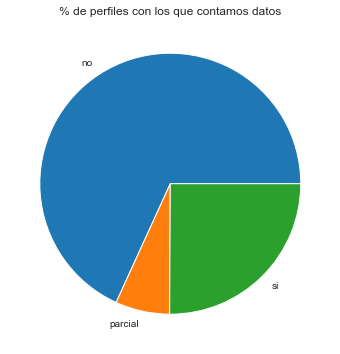

In [33]:
tipo_de_dato = ['no', 'parcial','si']
cantidad = [2390,236,879]
plt.pie(cantidad, labels=tipo_de_dato)
plt.title("% de perfiles con los que contamos datos" )
plt.show()

#Con esta informacion desde la agencia ZZZ podemos ver que el departamento de Talent (quien se encarga del contacto con los talentos) no esta consiguiendo las metricas reales de la mayoria de los perfiles y deberiamos tomar accion en este aspecto

## Base de datos: Resultados por Contenido

En este DF vamos a ver por cada linea un contenido con sus KPIs reales logradas.

In [34]:
path_file2 = "data/Base de datos Argentina  (1).xlsx"
data_resultados = pd.read_excel(path_file2)

In [35]:
data_resultados.head()

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Imp/alc,ER,Reach/foll,Plataforma,Marca,Acción,Fecha
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.0,1.2,NaN,0.280000,Instagram,Ala,Sou,Feb - Mar 2022
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.0,1.2,0.035,0.210000,Instagram,Eucerin,Curitas,2022-06-01 00:00:00
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.0,1.03,NaN,0.097500,Instagram,ALA,SOU,2021-07-01 00:00:00
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.0,1.03,NaN,0.099691,Instagram,ALA,SOU,2021-07-01 00:00:00
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.0,1.03,NaN,0.104846,Instagram,ALA,SOU,2021-07-01 00:00:00


In [36]:
data_resultados.columns

Index([' Account', 'Followers', 'Servicio', 'Alcance', 'Impresiones',
       'Interacciones', 'Imp/alc', 'ER', 'Reach/foll', 'Plataforma', 'Marca',
       'Acción', 'Fecha'],
      dtype='object')

In [37]:
print(f" El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay {data_resultados.shape[0]} filas y {data_resultados.shape[1]} columnas. Los tipos de datos por columnas son {data_resultados.dtypes}")

 El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay 13129 filas y 13 columnas. Los tipos de datos por columnas son  Account          object
Followers          int64
Servicio          object
Alcance            int64
Impresiones      float64
Interacciones    float64
Imp/alc           object
ER                object
Reach/foll       float64
Plataforma        object
Marca             object
Acción            object
Fecha             object
dtype: object


En este caso vamos a analizar la cantidad de duplicados, es probable que existan. Porque conociendo la base de datos, cuando los creadores de contenido no envian toda la informacion de sus metricas, se duplican los resultados de un contenido similar del que tenemos datos disponibles

In [38]:
cantidad_duplicados1 = len(data_resultados) - len(data_resultados.drop_duplicates())
cantidad_duplicados1

509

Para analizar los NaN por columnas.

In [39]:
data_resultados.isna().sum()

 Account             0
Followers            0
Servicio             0
Alcance              0
Impresiones          1
Interacciones      372
Imp/alc             32
ER               10962
Reach/foll           0
Plataforma           0
Marca                0
Acción             169
Fecha                0
dtype: int64

Las columnas de reach/foll, Imp/alc y ER podemos eliminarlas y calcularlas desde python para asegurarnos que no existan errores. Por lo cual vamos a eliminarlas y volver a agregarlas

In [40]:
data_resultados = data_resultados.drop(['Reach/foll','Imp/alc','ER'], axis=1)
data_resultados

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.000,Instagram,Ala,Sou,Feb - Mar 2022
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.000,Instagram,Eucerin,Curitas,2022-06-01 00:00:00
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
13124,merydelcerrok,2600000,Story Foto,158664,19798.0,4.033,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13125,merydelcerrok,2600000,Story Foto,166656,198156.0,1.294,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13126,merydelcerrok,2600000,Story Foto,105563,127547.0,3.921,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13127,merydelcerrok,2600000,Story Foto,154646,194407.0,4.850,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00


In [41]:
data_resultados["reach/foll"] = data_resultados['Alcance']/data_resultados['Followers']

In [42]:
data_resultados['Imp/Alc'] = data_resultados['Impresiones'] / data_resultados['Alcance']

In [43]:
data_resultados['ER'] = data_resultados['Interacciones'] / data_resultados['Impresiones']

Para analizar si las columnsa se agregaron y si los datos de ER son los correctos

In [44]:
data_resultados.nlargest(3, 'ER')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
248,cocinaglutenfree.ok,16300,Story Foto,1042,1411.0,2744.0,Instagram,???,Cross Food - covid (mar - abr),2020-01-03 00:00:00,0.063926,1.354127,1.944720
5515,mariel_percossi,74600,Post Foto,4487,5026.0,6542.0,Instagram,Dove,D Red Wave 1,2020-01-12 00:00:00,0.060147,1.120125,1.301632
249,cocinaglutenfree.ok,16300,Story Foto,911,1166.0,1217.0,Instagram,???,Cross Food - covid (mar - abr),2020-01-03 00:00:00,0.055890,1.279912,1.043739


En este caso contar con ER mayores a 1 es un caso extraño. Por lo cual vamos a analizar las columnas

In [45]:
data_resultados.describe()

,Followers,Alcance,Impresiones,Interacciones,reach/foll,Imp/Alc,ER
count,1.312900e+04,1.312900e+04,1.312800e+04,1.275700e+04,1.312900e+04,1.312800e+04,12756.000000
mean,4.201421e+05,2.626051e+10,6.621820e+04,2.135143e+03,2.254945e+05,1.574913e+00,0.017549
std,6.851198e+05,2.185055e+12,2.854645e+05,2.277314e+04,1.829109e+07,1.128001e+01,0.045844
min,1.837000e+03,9.600000e+01,1.190000e+02,0.000000e+00,3.692308e-05,1.150000e-10,0.000000
25%,5.500000e+04,4.233000e+03,4.674250e+03,1.100000e+01,4.783784e-02,1.020000e+00,0.001071
50%,1.310000e+05,1.116000e+04,1.224800e+04,4.500000e+01,8.764228e-02,1.080992e+00,0.003403
75%,4.350000e+05,3.792600e+04,4.288750e+04,2.210000e+02,1.619576e-01,1.154039e+00,0.014501
max,5.800000e+06,2.127217e+14,1.210862e+07,1.632528e+06,1.552713e+09,1.080552e+03,1.944720


Aca podemos notar que el 75% llega a 0.01 de ER y el maximo esta en 1.94 por lo cual podemos creer que hay registros mal cargados. Para eso utilizaremos un boxplot

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


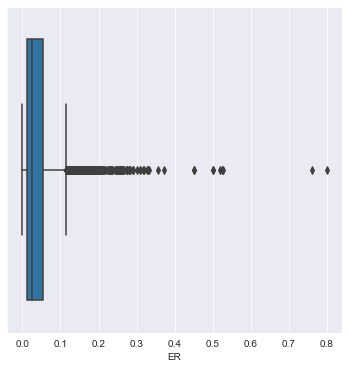

In [46]:
sns.boxplot(data_influencers['ER']);

Con este grafico podemos visualizar que existen datos "normales" hasta un ER de 0,04. Conociendo a la industria tiene logica, por lo cual vamos a filtar los datos que tengan un ER mayor a 0,4

In [47]:
filtro_ER = data_resultados['ER'] <= 0.4
data_resultados = data_resultados[filtro_ER]

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


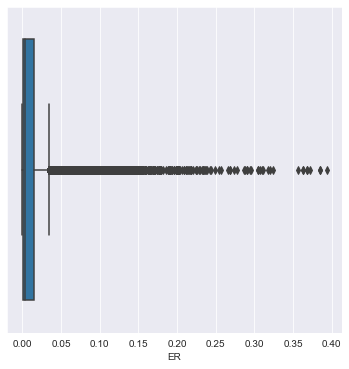

In [48]:
sns.boxplot(data_resultados['ER']);

En este caso queremos analizar con que marcas trabaja la agencia ZZZ en Argentina

In [49]:
data_resultados['Marca'].str.lower().unique()

array(['ala', 'eucerin', 'sedal', 'vivere', 'skip', 'amex', 'dove',
       'klorane', '???', 'clight', 'dkny', 'rexona', 'ath', 'cif',
       'baby dove', 'pierre fabre', 'puig', 'maizena', 'energizer',
       'cabify', 'tommy', 'amex\xa0', 'milkaut', 'coderhouse', 'ufs',
       'bagó', 'aperol', 'dermaglós', 'nivea', 'savora', 'ank',
       'cencosud', 'naranja x', 'tang', 'unilever', 'adler', 'knorr',
       'gps farma', 'gum', 'skip ', 'armorall', 'disco', "hellmann's",
       'jumbo argentina', 'drogueria del sud', 'twdc', 'bagovit', 'stp',
       'rexona ', 'estee lauder', 'savencia', 'tresemmé', 'mercado libre'],
      dtype=object)

En este caos queremos saber cuanto contenido es en Posteo y cuanto en Story

In [50]:
tipo_contenido = data_resultados[['Servicio', ' Account']].groupby('Servicio').count()
tipo_contenido

,Account
Servicio,
Post Foto,1963
Story Foto,10777


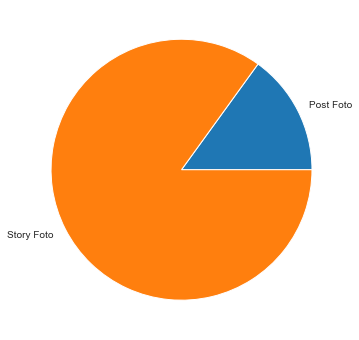

In [51]:
tipo_de_servio = ['Post Foto', 'Story Foto']
cantidad_por_servicio = [1973, 11156]
plt.pie(cantidad_por_servicio, labels=tipo_de_servio)
plt.show()

Y aca por plataforma:

In [52]:
contenido_plataforma = data_resultados[['Plataforma', ' Account']].groupby('Plataforma').count()
contenido_plataforma

,Account
Plataforma,
Facebook,3
Instagram,12658
TikTok,60
Tiktok,14
YouTube,3
Youtube,2


Pero como hay plataformas con distinta nomenclatura vamos a pasar todas a minuscula

In [53]:
data_resultados['Plataforma'] = data_resultados['Plataforma'].str.lower()

/var/folders/wc/9rg8g9gx0ns94q3_b9h1yp1w0000gn/T/ipykernel_24490/3265431105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resultados['Plataforma'] = data_resultados['Plataforma'].str.lower()


In [54]:
contenido_plataforma = data_resultados[['Plataforma', ' Account']].groupby('Plataforma').count()
contenido_plataforma

,Account
Plataforma,
facebook,3
instagram,12658
tiktok,74
youtube,5


La hipotesis para este trabajo es que el alcance que consigue un contenido esta relacionado con la cantidad de followers que tiene el creador de contenido.

Enco..

In [55]:
def contenido(x):
    if x =="Story Foto":
        return 1
    elif x == "Post Foto":
        return 0
    else:
        return 'error'

data_resultados["tipo_contenido"] = data_resultados["Servicio"].apply(contenido)

/var/folders/wc/9rg8g9gx0ns94q3_b9h1yp1w0000gn/T/ipykernel_24490/3356671047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resultados["tipo_contenido"] = data_resultados["Servicio"].apply(contenido)


In [56]:
data_resultados.head()

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER,tipo_contenido
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.0,instagram,Ala,Sou,Feb - Mar 2022,0.279482,1.200065,0.056449,0
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.0,instagram,Eucerin,Curitas,2022-06-01 00:00:00,0.212303,1.199971,0.035209,0
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.0,instagram,ALA,SOU,2021-07-01 00:00:00,0.097500,1.026907,0.015413,1
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.0,instagram,ALA,SOU,2021-07-01 00:00:00,0.099691,1.025697,0.015092,1
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.0,instagram,ALA,SOU,2021-07-01 00:00:00,0.104846,1.033559,0.014241,1


In [57]:
numericas = data_resultados.select_dtypes(exclude=['object']).columns
numericas

Index(['Followers', 'Alcance', 'Impresiones', 'Interacciones', 'reach/foll',
       'Imp/Alc', 'ER', 'tipo_contenido'],
      dtype='object')

In [ ]:
variable = 'Alcance'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = data_resultados, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = data_resultados, x = f"{variable}", ax=ax[1])

In [ ]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
data_resultados['Impresiones'] = rb_scaler.fit_transform(data_resultados[['Impresiones']]).T
data_resultados.head()

## Modelo Regresion Lineal

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    data_resultados.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

Es sorprendente notar que la hipotesis a primer vista no se cumple y se puede visualizar que las impresiones tiene una relacion importante con las interacciones.

In [ ]:
sns.scatterplot(x='Impresiones', y='Interacciones', data=data_resultados);

In [ ]:
filtro_impresines = data_resultados['Impresiones'] <=300000

In [ ]:
sns.scatterplot(x='Impresiones', y='Interacciones', data=data_resultados[filtro_impresines]);

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='Impresiones', y='Interacciones', data=data_resultados, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='Impresiones', y='Interacciones', data=data_resultados.sample(10, random_state=6), ci=95);

In [ ]:
data_resultados = data_resultados[data_resultados['Impresiones'].notna()]
data_resultados = data_resultados[data_resultados['Interacciones'].notna()]

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Impresiones ~ Interacciones', data=data_resultados)

# Train the model to find best line
model = model.fit()
model

In [ ]:
print(model.params)

In [ ]:
model.rsquared

In [ ]:
model.summary()

In [ ]:
n=390
residuals = model.predict(data_resultados['Interacciones']) - data_resultados['Impresiones']
residuals.std()/data_resultados.Impresiones.std() * 1/(n**0.5)

In [ ]:
predicted_interacciones = model.predict(data_resultados['Interacciones'])
predicted_interacciones

In [ ]:
residuals = predicted_interacciones - data_resultados['Impresiones']
residuals

In [ ]:
sns.scatterplot(x=predicted_interacciones, y=residuals)
plt.xlabel('Predicted weight')
plt.ylabel('Residual weight');

In [ ]:
x = [121, 392]
model.predict(int(12))